In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn import preprocessing
from sklearn import neighbors, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
weather = pd.read_csv("C:/MRT/clusters_5/noTime.csv")
weather.head()

,Unnamed: 0,,StnPres,Temperature,RH,WS,WD,Precp,Holiday,morning,moon,night,target
0,0,0,1014.8,20.1,71.0,1.3,60.0,0.0,1,1,0,0,0
1,1,1,1014.4,19.9,73.0,0.8,67.0,0.0,1,1,0,0,0
2,2,2,1013.4,19.4,76.0,0.7,82.0,0.0,1,1,0,0,0
3,3,3,1013.9,19.5,77.0,0.7,102.0,0.0,1,1,0,0,0
4,4,4,1014.7,19.6,75.0,0.5,95.0,0.0,1,1,0,0,0


In [3]:
X=weather.iloc[:, 2:12].values
print(X)
# X=X.to_numpy()
y=weather.target.values
# y=y.to_numpy()

[[1.0148e+03 2.0100e+01 7.1000e+01 ... 1.0000e+00 0.0000e+00 0.0000e+00]
 [1.0144e+03 1.9900e+01 7.3000e+01 ... 1.0000e+00 0.0000e+00 0.0000e+00]
 [1.0134e+03 1.9400e+01 7.6000e+01 ... 1.0000e+00 0.0000e+00 0.0000e+00]
 ...
 [1.0252e+03 1.6100e+01 8.7000e+01 ... 0.0000e+00 0.0000e+00 1.0000e+00]
 [1.0252e+03 1.6000e+01 8.8000e+01 ... 0.0000e+00 0.0000e+00 1.0000e+00]
 [1.0250e+03 1.6100e+01 8.9000e+01 ... 0.0000e+00 0.0000e+00 1.0000e+00]]


In [53]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


C:\Users\Student\anaconda3\lib\site-packages\sklearn\multiclass.py:75: UserWarning: Label not 2 is present in all training examples.
  str(classes[c]))
C:\Users\Student\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

# we can change kernel to rbf, poly, linear
model = SVC(kernel='rbf',gamma='auto', C=10)
model.fit(X_train, y_train)

X_test = scaler.transform(X_test)
y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
num_correct_samples = accuracy_score(y_test, y_pred, normalize=False)


print('number of correct sample: {}'.format(num_correct_samples))
print('accuracy: {}'.format(accuracy))

# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.5, random_state=0)

# # Set the parameters by cross-validation
# tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
#                      'C': [1, 10, 100, 1000]},
#                     {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

# scores = ['precision', 'recall']

# for score in scores:
#     print("# Tuning hyper-parameters for %s" % score)
#     print()

#     clf = GridSearchCV(
#         SVC(), tuned_parameters, scoring='%s_macro' % score
#     )
#     clf.fit(X_train, y_train)

#     print("Best parameters set found on development set:")
#     print()
#     print(clf.best_params_)
#     print()
#     print("Grid scores on development set:")
#     print()
#     means = clf.cv_results_['mean_test_score']
#     stds = clf.cv_results_['std_test_score']
#     for mean, std, params in zip(means, stds, clf.cv_results_['params']):
#         print("%0.3f (+/-%0.03f) for %r"
#               % (mean, std * 2, params))
#     print()

#     print("Detailed classification report:")
#     print()
#     print("The model is trained on the full development set.")
#     print("The scores are computed on the full evaluation set.")
#     print()
#     y_true, y_pred = y_test, clf.predict(X_test)
#     print(classification_report(y_true, y_pred))
#     print()


number of correct sample: 4079
accuracy: 0.7719530658591975


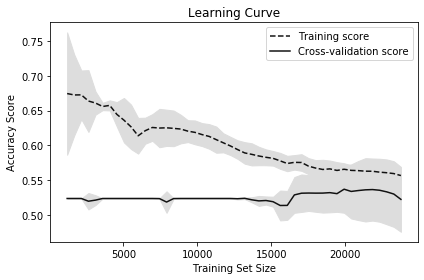

In [11]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(SVC(), 
                                                        X, 
                                                        y,
                                                        # Number of folds in cross-validation k=10
                                                        cv=10,
                                                        # Evaluation metric
                                                        scoring='accuracy',
                                                        # Use all computer cores -1 表使用全部核心
                                                        n_jobs=-1, 
                                                        # 50 different sizes of the training set 0.01-1 之間分50分
                                                        train_sizes=np.linspace(0.01, 1.0, 50))  

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [5]:
from joblib import dump, load
dump(model, 'SVC.joblib')

['SVC.joblib']

In [6]:
SVC_model = load('SVC.joblib') 

In [7]:
test = pd.read_csv("C:/MRT/test/noTime_test.csv")
test.head()

,Unnamed: 0,,StnPres,Temperature,RH,WS,WD,Precp,Holiday,morning,moon,night,target
0,0,0,1020.3,15.3,97.0,2.0,77,0.5,1,1,0,0,0
1,1,1,1019.2,15.2,97.0,1.9,76,0.5,1,1,0,0,0
2,2,2,1019.8,15.2,97.0,2.4,73,0.5,1,1,0,0,0
3,3,3,1020.4,15.2,97.0,2.5,74,1.0,1,1,0,0,0
4,4,4,1021.3,15.3,97.0,2.1,70,0.0,1,1,0,0,0


In [8]:
X=test.iloc[:, 2:12].values
print(X)
# X=X.to_numpy()
y=test.target.values
# y=y.to_numpy()

[[1.0203e+03 1.5300e+01 9.7000e+01 ... 1.0000e+00 0.0000e+00 0.0000e+00]
 [1.0192e+03 1.5200e+01 9.7000e+01 ... 1.0000e+00 0.0000e+00 0.0000e+00]
 [1.0198e+03 1.5200e+01 9.7000e+01 ... 1.0000e+00 0.0000e+00 0.0000e+00]
 ...
 [1.0263e+03 1.4200e+01 8.2000e+01 ... 0.0000e+00 0.0000e+00 1.0000e+00]
 [1.0263e+03 1.4600e+01 8.1000e+01 ... 0.0000e+00 0.0000e+00 1.0000e+00]
 [1.0259e+03 1.4600e+01 8.2000e+01 ... 0.0000e+00 0.0000e+00 1.0000e+00]]


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
y_pred = SVC_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

# accuracy = random_model.score(X_test, y_test)
#print prediction result
print(y_pred)
#print accuracy 
print(accuracy)

[1 1 1 ... 1 1 1]
0.4947678221059516
